#### Problem Statement

An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4 and P5). After intensive market research, they’ve deduced that the behavior of new market is similar to their existing market. 

In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for different segment of customers. This strategy has work exceptionally well for them. They plan to use the same strategy on new markets and have identified 2627 new potential customers. 

You are required to help the manager to predict the right group of the new customers.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 50)

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['figure.figsize'] = [15, 6]

In [35]:
train = pd.read_csv("~/Downloads/Train_aBjfeNk.csv")
test = pd.read_csv("~/Downloads/Test_LqhgPWU.csv")

In [3]:
train.shape, test.shape

((8068, 11), (2627, 10))

In [36]:
# combine the data
combined = pd.concat([train, test], ignore_index = True)

In [5]:
combined.head()

ID  Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0  462809    Male           No   22        No     Healthcare              1.0   
1  462643  Female          Yes   38       Yes       Engineer              NaN   
2  466315  Female          Yes   67       Yes       Engineer              1.0   
3  461735    Male          Yes   67       Yes         Lawyer              0.0   
4  462669  Female          Yes   40       Yes  Entertainment              NaN   

  Spending_Score  Family_Size  Var_1 Segmentation  
0            Low          4.0  Cat_4            D  
1        Average          3.0  Cat_4            A  
2            Low          1.0  Cat_6            B  
3           High          2.0  Cat_6            B  
4           High          6.0  Cat_6            A

In [7]:
# Statistical Test to verify Spending Score with Segmentation

# Ho: Spending Score has no effect on the Segmentation
# Ha: Spending Score has Effect on the Segmentation

tbl = pd.crosstab(train.Spending_Score, train.Segmentation)

In [9]:
import scipy.stats as stats

tstats, pvalue, df, exp_freq = stats.chi2_contingency(tbl)
print(tstats, pvalue)

# Inference: We reject the Ho meaning that Spending Score is significant

1516.8787583775006 0.0


In [10]:
train.Spending_Score.unique()

array(['Low', 'Average', 'High'], dtype=object)

In [12]:
pd.DataFrame(combined.groupby("Segmentation")
             ["Spending_Score"].value_counts())

Spending_Score
Segmentation Spending_Score                
A            Low                       1358
             Average                    343
             High                       271
B            Low                        884
             Average                    590
             High                       384
C            Average                    903
             Low                        662
             High                       405
D            Low                       1974
             High                       156
             Average                    138

* **C** Segment has the Highest No of **High Spenders**
* **D** Segment has the Highest Number of **Low Spenders**
* Where are the **Maximum Average Spenders** - **C**

Note: Clusters Count will be 4 in this dataset as the Segmentation is done in 04 parts A, B, C and D

In [13]:
combined.head()

ID  Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0  462809    Male           No   22        No     Healthcare              1.0   
1  462643  Female          Yes   38       Yes       Engineer              NaN   
2  466315  Female          Yes   67       Yes       Engineer              1.0   
3  461735    Male          Yes   67       Yes         Lawyer              0.0   
4  462669  Female          Yes   40       Yes  Entertainment              NaN   

  Spending_Score  Family_Size  Var_1 Segmentation  
0            Low          4.0  Cat_4            D  
1        Average          3.0  Cat_4            A  
2            Low          1.0  Cat_6            B  
3           High          2.0  Cat_6            B  
4           High          6.0  Cat_6            A

In [37]:
# Mapping the Target Variable
mapped = {"D":0, "A":1, "B":2, "C":3}

combined["Segmentation"] = combined.Segmentation.map(mapped)

In [17]:
# Univariate and Bivariate Analysis

combined.select_dtypes(exclude = np.number).columns

Index(['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score',
       'Var_1'],
      dtype='object')

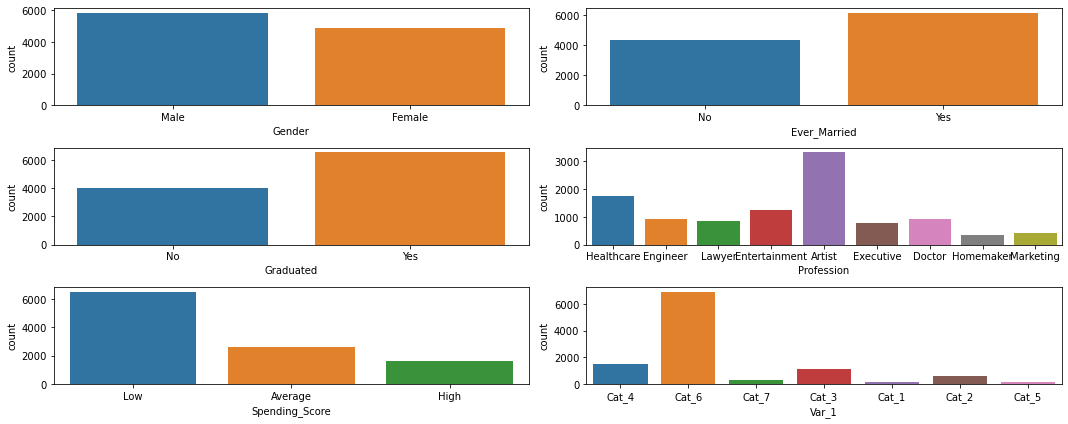

In [18]:
cols = ['Gender', 'Ever_Married', 'Graduated', 
        'Profession', 'Spending_Score',
       'Var_1']

a = 3
b = 2
c = 1

for i in cols:
    plt.subplot(a, b, c)
    sns.countplot(combined.loc[:, i])
    c = c+1
    
plt.tight_layout()
plt.show()

* More Males than Females followed by Graduation = Yes
* Most of the People are Married and mostly Artist followed by Healthcare
* Most of the People in the Data are low spenders
* Highest Freq of Var1 is Cat_6 followed by Cat_4, Cat3 and Cat_2

In [19]:
combined.select_dtypes(include = np.number).columns

Index(['ID', 'Age', 'Work_Experience', 'Family_Size', 'Segmentation'], dtype='object')

<AxesSubplot:>

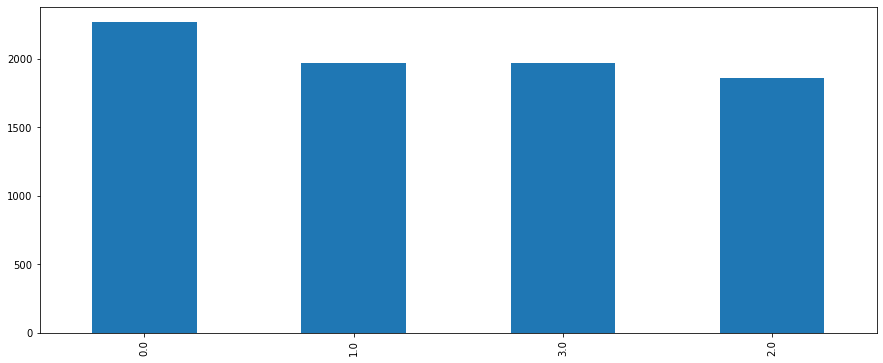

In [20]:
# Segmentation
combined.Segmentation.value_counts().plot(kind = "bar")

<AxesSubplot:xlabel='Age', ylabel='Density'>

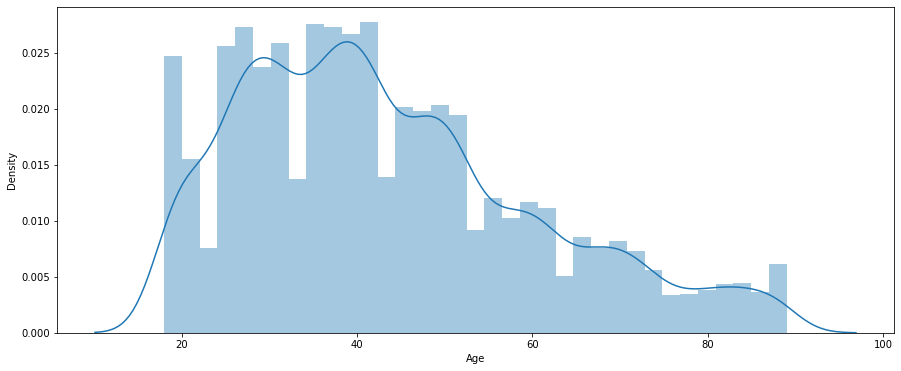

In [21]:
sns.distplot(combined.Age)

In [22]:
combined.Age.describe()

count    10695.000000
mean        43.511828
std         16.774158
min         18.000000
25%         30.000000
50%         41.000000
75%         53.000000
max         89.000000
Name: Age, dtype: float64

In [23]:
# Lets explore age basis spending score and Segmentation

combined.groupby(["Spending_Score", "Segmentation"])["Age"].describe()

count       mean        std   min   25%   50%  \
Spending_Score Segmentation                                                   
Average        0.0            138.0  37.746377  11.353035  18.0  30.0  36.0   
               1.0            343.0  42.157434  11.885602  20.0  35.0  40.0   
               2.0            590.0  46.866102  10.451637  25.0  38.0  46.0   
               3.0            903.0  50.053156  10.195182  22.0  42.0  50.0   
High           0.0            156.0  48.192308  20.404653  18.0  30.0  42.0   
               1.0            271.0  58.494465  20.482490  18.0  39.5  59.0   
               2.0            384.0  58.643229  16.154292  18.0  45.0  58.0   
               3.0            405.0  60.167901  14.733489  19.0  49.0  60.0   
Low            0.0           1974.0  31.915907  14.833252  18.0  22.0  28.0   
               1.0           1358.0  42.916053  15.138088  18.0  32.0  40.0   
               2.0            884.0  44.554299  14.597057  18.0  33.0  42.0   
               3.0            662.0  41.160121  14.793844  18.0  30.0  38.0   

                               75%   max  
Spending_Score Segmentation               
Average        0.0           41.75  72.0  
               1.0           48.50  89.0  
               2.0           53.00  74.0  
               3.0           57.00  88.0  
High           0.0           68.00  89.0  
               1.0           77.00  89.0  
               2.0           72.00  89.0  
               3.0           71.00  89.0  
Low            0.0           35.00  89.0  
               1.0           50.00  89.0  
               2.0           53.00  89.0  
               3.0           50.00  88.0

* Age Bins: 18-25 | 25-30 | 30-40 | 40-50 | >50

* Check Anova

In [25]:
# Ho: Age has no impact on the Tgt
# Ha: Age has an Impact on the Segmentation

# This means that we have to explore and specify the Age Brackets 
# for effective targeting...

from statsmodels.formula.api import ols
from  statsmodels.stats.anova import anova_lm

model = ols("Age~Segmentation", data = train).fit()
anova_lm(model)

# Inference: Age is significant for the Target

df        sum_sq        mean_sq           F         PR(>F)
Segmentation     3.0  3.396070e+05  113202.343669  477.102025  2.188783e-285
Residual      8064.0  1.913351e+06     237.270726         NaN            NaN

In [38]:
# Lets deal with Age
combined.loc[(combined.Age<=25) & (combined.Age>=18), "Age_Category"]=1
combined.loc[(combined.Age<=30) & (combined.Age>25), "Age_Category"]=2
combined.loc[(combined.Age<=40) & (combined.Age>30), "Age_Category"]=3
combined.loc[(combined.Age<=50) & (combined.Age>40), "Age_Category"]=4
combined.loc[(combined.Age>50), "Age_Category"]=5

In [27]:
combined.head()

ID  Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0  462809    Male           No   22        No     Healthcare              1.0   
1  462643  Female          Yes   38       Yes       Engineer              NaN   
2  466315  Female          Yes   67       Yes       Engineer              1.0   
3  461735    Male          Yes   67       Yes         Lawyer              0.0   
4  462669  Female          Yes   40       Yes  Entertainment              NaN   

  Spending_Score  Family_Size  Var_1  Segmentation  Age_Category  
0            Low          4.0  Cat_4           0.0           1.0  
1        Average          3.0  Cat_4           1.0           3.0  
2            Low          1.0  Cat_6           2.0           5.0  
3           High          2.0  Cat_6           2.0           5.0  
4           High          6.0  Cat_6           1.0           3.0

<AxesSubplot:>

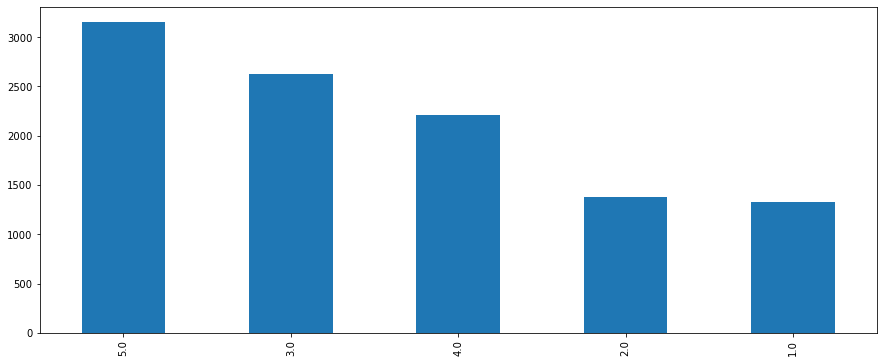

In [28]:
combined.Age_Category.value_counts().plot(kind = "bar")

In [29]:
# Missing Values
combined.isnull().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation       2627
Age_Category          0
dtype: int64

In [39]:
# Imputting unk in the Missing Values
combined["Ever_Married"] = combined.Ever_Married.fillna("unk")
combined["Graduated"] = combined.Graduated.fillna("unk")
combined["Profession"] = combined.Profession.fillna("unk")
combined["Work_Experience"] = combined.Work_Experience.fillna(-1)
combined["Family_Size"] = combined.Family_Size.fillna(-1)
combined["Var_1"] = combined.Var_1.fillna("unk")

In [41]:
combined.head()

ID  Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0  462809    Male           No   22        No     Healthcare              1.0   
1  462643  Female          Yes   38       Yes       Engineer             -1.0   
2  466315  Female          Yes   67       Yes       Engineer              1.0   
3  461735    Male          Yes   67       Yes         Lawyer              0.0   
4  462669  Female          Yes   40       Yes  Entertainment             -1.0   

  Spending_Score  Family_Size  Var_1  Segmentation  Age_Category  
0            Low          4.0  Cat_4           0.0           1.0  
1        Average          3.0  Cat_4           1.0           3.0  
2            Low          1.0  Cat_6           2.0           5.0  
3           High          2.0  Cat_6           2.0           5.0  
4           High          6.0  Cat_6           1.0           3.0

In [42]:
# Map the Variables
combined["Gender"] = combined.Gender.map({"Male":1, 
                                          "Female":2})
combined["Ever_Married"] = combined.Ever_Married.map({"No":1, 
                                                      "Yes":2, "unk":3})
combined["Graduated"] = combined.Graduated.map({"No":1, 
                                                      "Yes":2, "unk":3})
combined["Spending_Score"] = combined.Spending_Score.map({"Low":1, 
                                                      "Average":2, 
                                                          "High":3})
combined["Var_1"] = combined.Var_1.map({"Cat_1":1,"Cat_2":2,"Cat_3":3,
                                        "Cat_4":4, "Cat_5":5, "Cat_6":6,
                                       "Cat_7":7, "unk":8})

In [46]:
combined.Profession.value_counts().index

Index(['Artist', 'Healthcare', 'Entertainment', 'Engineer', 'Doctor', 'Lawyer',
       'Executive', 'Marketing', 'Homemaker', 'unk'],
      dtype='object')

In [47]:
combined["Profession"] = combined.Profession.map({'Artist':1, 'Healthcare':2, 
                         'Entertainment':3, 'Engineer':4, 
                         'Doctor':5, 'Lawyer':6,
       'Executive':7, 'Marketing':8, 'Homemaker':9, 'unk':10})

In [52]:
combined.head()

ID  Gender  Ever_Married  Age  Graduated  Profession  Work_Experience  \
0  462809       1             1   22          1           2              1.0   
1  462643       2             2   38          2           4             -1.0   
2  466315       2             2   67          2           4              1.0   
3  461735       1             2   67          2           6              0.0   
4  462669       2             2   40          2           3             -1.0   

   Spending_Score  Family_Size  Var_1  Segmentation  Age_Category  Family_Cat  
0               1          4.0      4           0.0           1.0         2.0  
1               2          3.0      4           1.0           3.0         2.0  
2               1          1.0      6           2.0           5.0         1.0  
3               3          2.0      6           2.0           5.0         1.0  
4               3          6.0      6           1.0           3.0         3.0

In [51]:
# Family Category

combined.loc[combined.Family_Size<=2, "Family_Cat"]=1

combined.loc[(combined.Family_Size>2) & (combined.Family_Size<=5), 
             "Family_Cat"]=2

combined.loc[combined.Family_Size>5, "Family_Cat"]=3


In [53]:
combined.Work_Experience.describe()

count    10695.000000
mean         2.248153
std          3.394726
min         -1.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         14.000000
Name: Work_Experience, dtype: float64

In [54]:
combined.loc[combined.Work_Experience<=0, "Work_Cat"]=0
combined.loc[combined.Work_Experience==1, "Work_Cat"]=1

combined.loc[(combined.Work_Experience>=2) & (combined.Work_Experience<=5), 
             "Work_Cat"]=2

combined.loc[(combined.Work_Experience>5) & (combined.Work_Experience<=10), 
             "Work_Cat"]=3

combined.loc[combined.Work_Experience>10, "Work_Cat"]=4

### Feature Engineering

In [55]:
combined.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation', 'Age_Category', 'Family_Cat', 'Work_Cat'],
      dtype='object')

In [63]:
temp = combined.groupby("Age").agg({"Spending_Score":["count","min", 
                                                      "mean","max"],
                                   "Family_Size":["count","min","max"],
                                   "Work_Experience":["count", "min", 
                                                      "mean","max"],
                                   "Profession":["count","min", "max"],
                                   "Var_1":["count", "min", "max"]})

temp.columns = ["_".join(x) for x in temp.columns]
new = pd.merge(left = combined, right = temp, on = "Age", how = "left")

In [65]:
temp.head()

Spending_Score_count  Spending_Score_min  Spending_Score_mean  \
Age                                                                  
18                    174                   1             1.051724   
19                    184                   1             1.043478   
20                    178                   1             1.050562   
21                    153                   1             1.013072   
22                    184                   1             1.092391   

     Spending_Score_max  Family_Size_count  Family_Size_min  Family_Size_max  \
Age                                                                            
18                    3                174             -1.0              9.0   
19                    3                184             -1.0              9.0   
20                    3                178             -1.0              9.0   
21                    3                153             -1.0              8.0   
22                    3                184             -1.0              9.0   

     Work_Experience_count  Work_Experience_min  Work_Experience_mean  \
Age                                                                     
18                     174                 -1.0              1.902299   
19                     184                 -1.0              2.027174   
20                     178                 -1.0              1.724719   
21                     153                 -1.0              1.856209   
22                     184                 -1.0              1.820652   

     Work_Experience_max  Profession_count  Profession_min  Profession_max  \
Age                                                                          
18                  14.0               174               1              10   
19                  13.0               184               1              10   
20                  14.0               178               1              10   
21                  13.0               153               1              10   
22                  11.0               184               1              10   

     Var_1_count  Var_1_min  Var_1_max  
Age                                     
18           174          1          8  
19           184          1          8  
20           178          1          8  
21           153          1          8  
22           184          1          8

### Split the Data in Train and Test

In [75]:
train.shape, test.shape

#newtrain = new.loc[0:train.shape[0]-1, :]
newtest = new.loc[train.shape[0]:, :]

In [76]:
newtrain.shape, newtest.shape

((8068, 31), (2627, 31))

In [77]:
# Dropping Segmentation from newtest
X = newtrain.drop(["ID", "Segmentation"], axis = 1)
y = newtrain.Segmentation
newtest = newtest.drop(["ID", "Segmentation"], axis = 1)

In [70]:
del temp, combined # Deleted Temp Data and Combined

### Generating Cluster Labels


In [74]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, random_state = 420)
X["Clusters"] = kmeans.fit_predict(X)

In [78]:
# Generating Cluster Labels in Test Dataset
kmeans = KMeans(n_clusters = 4, random_state = 420)
newtest["Clusters"] = kmeans.fit_predict(newtest)

### Model Building

Note: We will build all the models by splitting Train Data as Website has some submission Issues.

1. Spilt the Train Data in Train & Test
2. Build Logistic Regression, Random Forest Model, Gradient Boosting followed by XGBoost Model.
3. We will separately build LGBM & Cat Boost.
4. We will see which models gets highest accuracy. We will use Cross Validation to build CV model where CV = 5
5. Stacking Classification Model

In [89]:
y = y.astype('int')

In [90]:
# Split the Data in Train & Test
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.20,
                                               random_state = 420, 
                                                stratify= X["Clusters"])

In [82]:
# Import Model Libraries and Create Model Instances

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, 
GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [91]:
# Models
lg = LogisticRegression(random_state = 140)
rf = RandomForestClassifier(random_state = 598, criterion = "entropy")
gbm = GradientBoostingClassifier(random_state = 150)
xgb = XGBClassifier(random_state = 138)
lgbm = LGBMClassifier(random_state = 438)
cboost = CatBoostClassifier(random_state = 660)

In [92]:
from sklearn.metrics import accuracy_score
for model, name in zip([lg, rf, gbm, xgb, lgbm, cboost], 
                       ["lg", "rf", "gbm", "xgb", "lgbm", "cboost"]):
    model.fit(xtrain, ytrain)
    print("{} model generates an Accuracy Score of {}".format(name,
                                            accuracy_score(ytest, 
                                              model.predict(xtest))))    

lg model generates an Accuracy Score of 0.4448574969021066
rf model generates an Accuracy Score of 0.47026022304832715
gbm model generates an Accuracy Score of 0.5291201982651796
xgb model generates an Accuracy Score of 0.5142503097893433
lgbm model generates an Accuracy Score of 0.5285006195786865
Learning rate set to 0.087021
0:	learn: 1.3387664	total: 3.81ms	remaining: 3.8s
1:	learn: 1.3024426	total: 7.2ms	remaining: 3.59s
2:	learn: 1.2719394	total: 10.6ms	remaining: 3.52s
3:	learn: 1.2448538	total: 13.9ms	remaining: 3.46s
4:	learn: 1.2224130	total: 16.8ms	remaining: 3.34s
5:	learn: 1.2054308	total: 19.6ms	remaining: 3.25s
6:	learn: 1.1889196	total: 22.5ms	remaining: 3.19s
7:	learn: 1.1739049	total: 25.4ms	remaining: 3.15s
8:	learn: 1.1619905	total: 28.1ms	remaining: 3.1s
9:	learn: 1.1495519	total: 31.1ms	remaining: 3.08s
10:	learn: 1.1390490	total: 33.9ms	remaining: 3.04s
11:	learn: 1.1296267	total: 36.7ms	remaining: 3.02s
12:	learn: 1.1209105	total: 39.5ms	remaining: 3s
13:	learn:

In [94]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

In [96]:
smote_xsamp, smote_y = smote.fit_resample(X, y)

In [102]:
sxtrain, sxtest, sytrain, sytest = train_test_split(smote_xsamp, 
                                                smote_y, test_size = 0.20,
                                               random_state = 420, 
                                                stratify= smote_xsamp["Clusters"])

In [103]:
for model, name in zip([lg, rf, gbm, xgb, lgbm, cboost], 
                       ["lg", "rf", "gbm", "xgb", "lgbm", "cboost"]):
    model.fit(sxtrain, sytrain)
    print("{} model generates an Accuracy Score of {}".format(name,accuracy_score(sytest, 
                                                                                  model.predict(sxtest))))

lg model generates an Accuracy Score of 0.45013774104683196
rf model generates an Accuracy Score of 0.5228650137741047
gbm model generates an Accuracy Score of 0.5366391184573003
xgb model generates an Accuracy Score of 0.5360881542699725
lgbm model generates an Accuracy Score of 0.5449035812672176
Learning rate set to 0.087543
0:	learn: 1.3397656	total: 18.4ms	remaining: 18.4s
1:	learn: 1.3022073	total: 24.2ms	remaining: 12.1s
2:	learn: 1.2778118	total: 30ms	remaining: 9.98s
3:	learn: 1.2521677	total: 35.6ms	remaining: 8.86s
4:	learn: 1.2300333	total: 41.5ms	remaining: 8.25s
5:	learn: 1.2109019	total: 47.4ms	remaining: 7.84s
6:	learn: 1.1941905	total: 52.6ms	remaining: 7.46s
7:	learn: 1.1780873	total: 58.6ms	remaining: 7.26s
8:	learn: 1.1674627	total: 63.9ms	remaining: 7.04s
9:	learn: 1.1572678	total: 69.4ms	remaining: 6.88s
10:	learn: 1.1467619	total: 74.7ms	remaining: 6.72s
11:	learn: 1.1391728	total: 80.1ms	remaining: 6.59s
12:	learn: 1.1294515	total: 85.6ms	remaining: 6.5s
13:	lea

In [108]:
# Final Models XGB, Cb, GBM & LGBM
# Stacking Classifier
from sklearn.ensemble import StackingClassifier
level0 = [("xgb", xgb), ("gbm", gbm), ("cboost", cboost)]
level1 = lgbm
stack = StackingClassifier(estimators=level0, final_estimator=level1,
                          cv = 5)
pred_stack = stack.fit(sxtrain, sytrain).predict(xtest)
#print("{} model generates an Accuracy Score of {}".format(name,accuracy_score(ytest, pred_stack)))

cboost model generates an Accuracy Score of 0.5755885997521685


In [112]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits = 5, shuffle = True)

level0 = [("xgb", xgb), ("gbm", gbm), ("cboost", cboost)]
level1 = lgbm
stack = StackingClassifier(estimators=level0, final_estimator=level1,
                          cv = 5)

pred_model = pd.DataFrame()
n = 10
for i in range(n):
    folds = next(kfold.split(smote_xsamp, smote_y)) # smote_xsamp, smote_y
    sxtrain = smote_xsamp.iloc[folds[0]]
    sytrain = smote_y.iloc[folds[0]]
    pred_model[i] = stack.fit(sxtrain, sytrain).predict(xtest)
        
vals = pred_model.mode(axis = 1)
print(accuracy_score(ytest, vals[0]))

Learning rate set to 0.087543
0:	learn: 1.3387589	total: 12.2ms	remaining: 12.2s
1:	learn: 1.3037254	total: 17.5ms	remaining: 8.72s
2:	learn: 1.2759026	total: 23.2ms	remaining: 7.71s
3:	learn: 1.2484037	total: 29ms	remaining: 7.23s
4:	learn: 1.2297672	total: 34.1ms	remaining: 6.79s
5:	learn: 1.2107731	total: 39.7ms	remaining: 6.58s
6:	learn: 1.1936310	total: 45.4ms	remaining: 6.44s
7:	learn: 1.1789057	total: 51ms	remaining: 6.32s
8:	learn: 1.1680897	total: 56.5ms	remaining: 6.22s
9:	learn: 1.1582443	total: 61.9ms	remaining: 6.13s
10:	learn: 1.1464287	total: 67.2ms	remaining: 6.04s
11:	learn: 1.1369772	total: 74.5ms	remaining: 6.13s
12:	learn: 1.1291288	total: 81.7ms	remaining: 6.2s
13:	learn: 1.1217287	total: 99.7ms	remaining: 7.02s
14:	learn: 1.1153970	total: 106ms	remaining: 6.94s
15:	learn: 1.1079366	total: 112ms	remaining: 6.87s
16:	learn: 1.1022320	total: 118ms	remaining: 6.8s
17:	learn: 1.0968919	total: 123ms	remaining: 6.69s
18:	learn: 1.0935690	total: 128ms	remaining: 6.6s
19:	

ValueError: Input y_pred contains NaN.

0.6883519206939281